## Web Scraping AmbitionBox Data
This repository contains a Python script for web scraping company data from AmbitionBox, a popular platform for company reviews and insights in India.

Importing Libraries

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import time

In [ ]:
base_url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'

In [ ]:
page=requests.get(base_url)

In [ ]:
page

<Response [403]>

200
<!doctype html>
<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">
  <head >
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">
    <meta http-equiv="X-UA-Compatible" content="IE=edge"> 
    <link rel="manifest" href="/assets/next/manifest.json">
    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>
    <script src="/static/js/env-runtime.js"></script>
    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()</script>
    <title>Companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2025 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="c
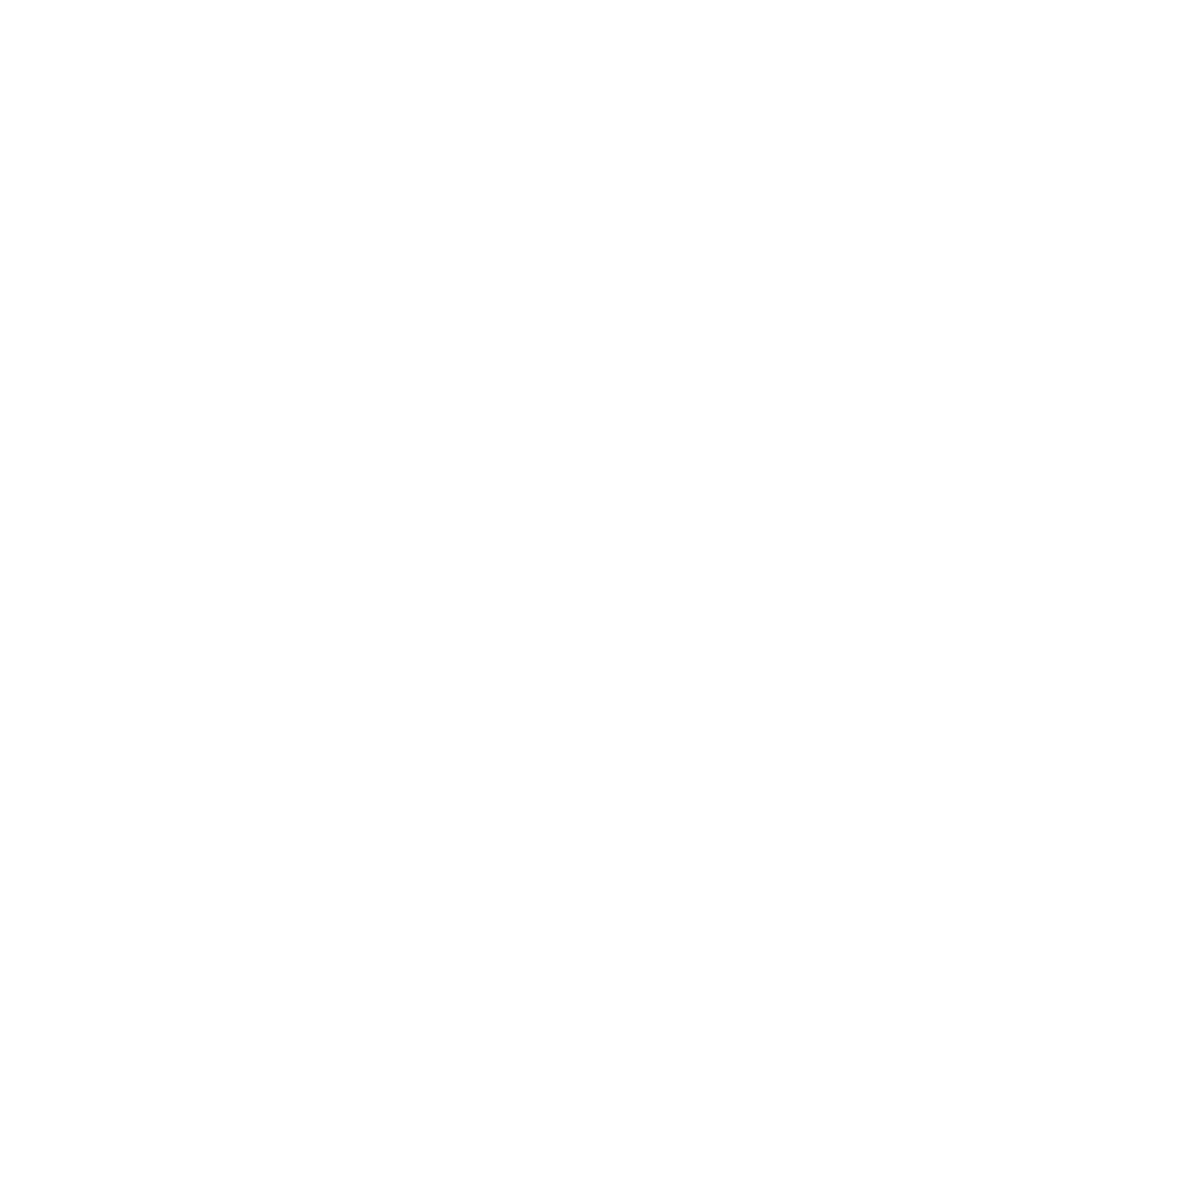

In [ ]:
import requests

url = "https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Referer': 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'
}
response = requests.get(base_url, headers=headers)
print(response.status_code)
if response.status_code == 403:
  print("Access denied. Try modifying headers or check site restrictions.")
else:
  print(response.text)

In [ ]:
soup= BeautifulSoup(response.text,'lxml')

In [ ]:
soup.find_all('h1')[0].text

'\n\t\t\t\t\t\t\tCompanies in India\n\t\t\t\t\t\t'

In [ ]:
company=soup.find_all('div',class_='companyCardWrapper')
len(company)

20

In [ ]:
name=[]

for i in soup.find_all('h2'):
  name.append(i.text.strip())

name

['TCS',
 'Accenture',
 'Wipro',
 'Cognizant',
 'Capgemini',
 'HDFC Bank',
 'Infosys',
 'ICICI Bank',
 'HCLTech',
 'Tech Mahindra',
 'Genpact',
 'Teleperformance',
 'Concentrix Corporation',
 'Axis Bank',
 'Amazon',
 'Jio',
 'iEnergizer',
 'Reliance Retail',
 'IBM',
 'LTIMindtree',
 'Companies by Industry',
 'Companies by Locations',
 'Companies by Type']

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

base_url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.ambitionbox.com/'
}


company_names = []
ratings = []
reviews_count = []
salary_count = []
interview_count = []
jobs_count = []
locations = []
highly_rated_for = []
critically_rated_for = []

max_pages_to_scrape = 150

for page_num in range(1, max_pages_to_scrape + 1):
    url = f"{base_url}&page={page_num}"
    print(f"Scraping page: {page_num}")

    try:
        #response = requests.get(url, headers=headers)
        #response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')

        company_cards = soup.find_all('div', class_='companyCardWrapper')

        if not company_cards:
            print(f"No more company cards found on page {page_num}. Exiting loop.")
            break

        for card in company_cards:
            name_tag = card.find('h2', class_='companyCardWrapper__companyName')
            company_names.append(name_tag.text.strip() if name_tag else 'N/A')

            rating_tag = card.find('p', class_='rating')
            if rating_tag:
                try:
                    ratings.append(float(rating_tag.text.strip()))
                except ValueError:
                    ratings.append('N/A')
            else:
                ratings.append('N/A')

            reviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Reviews')
            reviews_count.append(reviews_tag.find_previous_sibling('span').text.strip() if reviews_tag and reviews_tag.find_previous_sibling('span') else 'N/A')

            salaries_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Salaries')
            salary_count.append(salaries_tag.find_previous_sibling('span').text.strip() if salaries_tag and salaries_tag.find_previous_sibling('span') else 'N/A')

            interviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Interviews')
            interview_count.append(interviews_tag.find_previous_sibling('span').text.strip() if interviews_tag and interviews_tag.find_previous_sibling('span') else 'N/A')

            jobs_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Jobs')
            jobs_count.append(jobs_tag.find_previous_sibling('span').text.strip() if jobs_tag and jobs_tag.find_previous_sibling('span') else 'N/A')

            location_tag = card.find('span', class_='companyCardWrapper__interLinking')
            locations.append(location_tag.text.strip() if location_tag else 'N/A')

            highly_rated_section = card.find('div', class_='companyCardWrapper__ratingSection')
            highly_rated_text = 'N/A'
            if highly_rated_section:
                highly_rated_for_span = highly_rated_section.find('span', class_="companyCardWrapper__ratingHeader--high")
                if highly_rated_for_span:
                    next_sibling = highly_rated_for_span.find_next_sibling('span')
                    if next_sibling:
                        highly_rated_text = next_sibling.text.strip()
            highly_rated_for.append(highly_rated_text)

            critically_rated_text = 'N/A'
            if highly_rated_section:
                critically_rated_for_span = highly_rated_section.find('span', class_="companyCardWrapper__ratingHeader--critical")
                if critically_rated_for_span:
                    next_sibling = critically_rated_for_span.find_next_sibling('span')
                    if next_sibling:
                        critically_rated_text = next_sibling.text.strip()
            critically_rated_for.append(critically_rated_text)

        time.sleep(2)

    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error on page {page_num}: {e}")
        print("Stopping scraping due to HTTP error.")
        break
    except requests.exceptions.RequestException as e:
        print(f"Request Error on page {page_num}: {e}")
        print("Stopping scraping due to network/request error.")
        break
    except Exception as e:
        print(f"An unexpected error occurred on page {page_num}: {e}")
        print("Stopping scraping due to an unexpected error.")
        break

df = pd.DataFrame({
    'Company Name': company_names,
    'Rating': ratings,
    'Reviews': reviews_count,
    'Salaries': salary_count,
    'Interviews': interview_count,
    'Jobs': jobs_count,
    'Location': locations,
    'Highly Rated For': highly_rated_for,
    'Critically Rated For': critically_rated_for
})

print("\n--- Scraped Data Sample ---")
print(df.head())
print(f"\nTotal rows extracted: {len(df)}")


Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40
Scraping page: 41
Scraping page: 42
Scraping page: 43
Scraping page: 44
Scraping page: 45
Scraping page: 46
Scraping page: 47
Scraping page: 48
Scraping page: 49
Scraping page: 50
Scraping page: 51
Scraping page: 52
Scraping page: 53
Scraping page: 54
Scraping page: 55
Scraping page: 56
S

In [ ]:
df

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Location,Highly Rated For,Critically Rated For
0,TCS,N/A,96.3k,9.1L,10.9k,173,IT Services & Consulting | Bangalore / Bengalu...,N/A,N/A
1,Accenture,N/A,61.8k,6L,8.5k,9.6k,IT Services & Consulting | Bangalore / Bengalu...,N/A,N/A
2,Wipro,N/A,56.4k,4.6L,5.9k,6.6k,IT Services & Consulting | Bangalore / Bengalu...,N/A,N/A
3,Cognizant,N/A,53.6k,5.8L,5.8k,410,IT Services & Consulting | Hyderabad / Secunde...,N/A,N/A
4,Capgemini,N/A,45.2k,4.5L,5k,1.7k,IT Services & Consulting | Bangalore / Bengalu...,N/A,N/A
...,...,...,...,...,...,...,...,...,...
2995,Jio,N/A,25.1k,61.2k,2.1k,50,Telecom | Mumbai +1416 other locations,N/A,N/A
2996,iEnergizer,N/A,24.2k,22.8k,718,326,BPO | Noida +44 other locations,N/A,N/A
2997,Reliance Retail,N/A,23.8k,65.8k,1.6k,106,Retail | Mumbai +1086 other locations,N/A,N/A
2998,IBM,N/A,23.2k,2L,2.4k,1.5k,IT Services & Consulting | Bangalore / Bengalu...,N/A,N/A


#Data Cleaning

In [ ]:
distinct_values = df['Location'].unique()
print(distinct_values)

['IT Services & Consulting | Bangalore / Bengaluru +413 other locations'
 'IT Services & Consulting | Bangalore / Bengaluru +224 other locations'
 'IT Services & Consulting | Bangalore / Bengaluru +357 other locations'
 'IT Services & Consulting | Hyderabad / Secunderabad +211 other locations'
 'IT Services & Consulting | Bangalore / Bengaluru +171 other locations'
 'Banking | Mumbai +1688 other locations'
 'IT Services & Consulting | Bangalore / Bengaluru +227 other locations'
 'Banking | Mumbai +1391 other locations'
 'IT Services & Consulting | Chennai +216 other locations'
 'IT Services & Consulting | Hyderabad / Secunderabad +318 other locations'
 'IT Services & Consulting | Hyderabad / Secunderabad +160 other locations'
 'BPO | Mumbai +245 other locations'
 'BPO | Bangalore / Bengaluru +164 other locations'
 'Banking | Mumbai +1412 other locations'
 'Internet | Bangalore / Bengaluru +497 other locations'
 'Telecom | Mumbai +1416 other locations'
 'BPO | Noida +44 other locations'

In [ ]:
columns_to_drop = ['Rating', 'Highly Rated For', 'Critically Rated For']

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  3000 non-null   object
 1   Reviews       3000 non-null   object
 2   Salaries      3000 non-null   object
 3   Interviews    3000 non-null   object
 4   Jobs          3000 non-null   object
 5   Location      3000 non-null   object
dtypes: object(6)
memory usage: 140.8+ KB


In [ ]:
df.head()

,Company Name,Reviews,Salaries,Interviews,Jobs,Location
0,TCS,96.3k,9.1L,10.9k,173,IT Services & Consulting | Bangalore / Bengalu...
1,Accenture,61.8k,6L,8.5k,9.6k,IT Services & Consulting | Bangalore / Bengalu...
2,Wipro,56.4k,4.6L,5.9k,6.6k,IT Services & Consulting | Bangalore / Bengalu...
3,Cognizant,53.6k,5.8L,5.8k,410,IT Services & Consulting | Hyderabad / Secunde...
4,Capgemini,45.2k,4.5L,5k,1.7k,IT Services & Consulting | Bangalore / Bengalu...


In [ ]:
data = df

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import re

data['Industry'] = data['Location'].apply(lambda x: x.split(' | ')[0] if ' | ' in x else None)

def extract_primary_city(location_str):
    if ' | ' in location_str:
        parts = location_str.split(' | ')[1]
        city = re.sub(r'\s*\+\d+\s*other locations', '', parts)
        city = city.replace(' / Bengaluru', '').strip()
        return city
    return None

data['Primary_City'] = data['Location'].apply(extract_primary_city)

def extract_num_other_locations(location_str):
    match = re.search(r'\+(\d+)\s*other locations', location_str)
    if match:
        return int(match.group(1))
    return 0

data['Num_Other_Locations'] = data['Location'].apply(extract_num_other_locations)
data['Primary_City'] = data['Primary_City'].replace({'Bangalore': 'Bengaluru', 'Noida': 'Noida'})
data['Industry'].fillna('Unknown', inplace=True)

data.drop('Location', axis=1, inplace=True)

print(data[['Industry', 'Primary_City', 'Num_Other_Locations']].head())

                   Industry              Primary_City  Num_Other_Locations
0  IT Services & Consulting                 Bengaluru                  413
1  IT Services & Consulting                 Bengaluru                  224
2  IT Services & Consulting                 Bengaluru                  357
3  IT Services & Consulting  Hyderabad / Secunderabad                  211
4  IT Services & Consulting                 Bengaluru                  171


<ipython-input-101-21af87cf8cbb>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Industry'].fillna('Unknown', inplace=True)


In [ ]:
data.head()

,Company Name,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
0,TCS,96.3k,9.1L,10.9k,173,IT Services & Consulting,Bengaluru,413
1,Accenture,61.8k,6L,8.5k,9.6k,IT Services & Consulting,Bengaluru,224
2,Wipro,56.4k,4.6L,5.9k,6.6k,IT Services & Consulting,Bengaluru,357
3,Cognizant,53.6k,5.8L,5.8k,410,IT Services & Consulting,Hyderabad / Secunderabad,211
4,Capgemini,45.2k,4.5L,5k,1.7k,IT Services & Consulting,Bengaluru,171


In [ ]:
data.shape

(3000, 8)

In [ ]:
distinct_values = data['Primary_City'].unique()
print(distinct_values)

['Bengaluru' 'Hyderabad / Secunderabad' 'Mumbai' 'Chennai' 'Noida']


In [ ]:
data['Primary_City'] = data['Primary_City'].replace('Hyderabad / Secunderabad', 'Hyderabad')


In [ ]:
distinct_values = data['Primary_City'].unique()
print(distinct_values)

['Bengaluru' 'Hyderabad' 'Mumbai' 'Chennai' 'Noida']


In [ ]:
def convert_to_numeric(value):
    if pd.isna(value):
        return None
    s = str(value).strip()
    if 'k' in s:
        return float(s.replace('k', '')) * 1000
    elif 'L' in s:
        return float(s.replace('L', '')) * 100000
    elif ',' in s:
        return float(s.replace(',', ''))
    try:
        return float(s)
    except ValueError:
        return None

columns_to_convert = ['Reviews', 'Salaries', 'Interviews', 'Jobs']

for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_numeric)

data['Num_Other_Locations'] = pd.to_numeric(data['Num_Other_Locations'], errors='coerce').fillna(0).astype(int)

print(data.info())

print("\nDataFrame head after type conversion:")
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         3000 non-null   object 
 1   Reviews              3000 non-null   float64
 2   Salaries             3000 non-null   float64
 3   Interviews           3000 non-null   float64
 4   Jobs                 2850 non-null   float64
 5   Industry             3000 non-null   object 
 6   Primary_City         3000 non-null   object 
 7   Num_Other_Locations  3000 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 187.6+ KB
None

DataFrame head after type conversion:
  Company Name  Reviews  Salaries  Interviews    Jobs  \
0          TCS  96300.0  910000.0     10900.0   173.0   
1    Accenture  61800.0  600000.0      8500.0  9600.0   
2        Wipro  56400.0  460000.0      5900.0  6600.0   
3    Cognizant  53600.0  580000.0      5800.0   410.0   
4

In [ ]:
data.head()

,Company Name,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
0,TCS,96300.0,910000.0,10900.0,173.0,IT Services & Consulting,Bengaluru,413
1,Accenture,61800.0,600000.0,8500.0,9600.0,IT Services & Consulting,Bengaluru,224
2,Wipro,56400.0,460000.0,5900.0,6600.0,IT Services & Consulting,Bengaluru,357
3,Cognizant,53600.0,580000.0,5800.0,410.0,IT Services & Consulting,Hyderabad,211
4,Capgemini,45200.0,450000.0,5000.0,1700.0,IT Services & Consulting,Bengaluru,171


#Save CSV File

In [ ]:
data.to_csv('ambition_box_data.csv', index=False)
print("Data successfully saved to 'ambition_box_data.csv'")

Data successfully saved to 'ambition_box_data.csv'
